---
title: "Linear Regression, Classification, Clustering"
format:
  html:
    code-tools:
      source: https://github.com/brandon-toews/IntroToAI-Assignment1
    code-fold: true
  pdf: default
author: "Brandon Toews"
badges: true
categories:
- AI / ML
date: "2022-12-22"
description: Project to compare different AI algorithms and an exploration of how to improve their accuracy.
toc: true
number-sections: true
image: post-pic.png
twitter-card: true
card-style: summary
crossref:
  fig-title: '**Figure**'
  fig-labels: arabic
  title-delim: "**.**"
---

![](AI.jpeg)

# Project Overview
## Purpose of Document
The purpose of this document is to provide a comparison between different AI models for a given dataset to determine which models are most accurate. This document also explores what measures can be taken to improve accuracy in various AI models.

## Scope
The scope of the project involves an exploratory examination of a dataset to determine how best to sample and clean the data for AI training and testing purposes. Various data visualizations are needed to properly understand the dataset and how best to proceed with training models. Training of various models and algorithms are required to produce sufficient comparisons with the ultimate goal of improving accuracy.

# Dataset Exploratory Analysis
## Descriptive Analysis
The dataset used in this project consists of available independent variables for a variety of cars to ascertain how they affect the price. The chosen dataset contains [26 columns and 205 rows of data](#dataset-shape) with [no null values](#dataset-info). It is a sufficient dataset in terms of size and types of data for use in training univariate & multivariate linear regression, classification and clustering models.

**The Columns**

- Car_ID : Unique id of each observation (Integer)
- Symboling : Its assigned insurance risk rating, A value of +3 - Indicates that the auto is risky, -3 that it is probably pretty safe.
- carCompany : Name of car company (Categorical)
- fueltype : Car fuel type i.e gas or diesel (Categorical)
- aspiration : Aspiration used in a car (Categorical)
- doornumber : Number of doors in a car (Categorical)
- carbody : Body of car (Categorical)
- drivewheel : Type of drive wheel (Categorical)
- enginelocation : Location of car engine (Categorical)
- wheelbase : Wheelbase of car (Numeric)
- carlength : Length of car (Numeric)
- carwidth : Width of car (Numeric)
- carheight : Height of car (Numeric)
- curbweight : The weight of a car without occupants or baggage. (Numeric)
- enginetype : Type of engine. (Categorical)
- cylindernumber : Cylinder placed in the car (Numeric)
- enginesize : Size of car (Numeric)
- fuelsystem : Fuel system of car (Categorical)
- boreratio : Boreratio of car (Numeric)
- stroke : Stroke or volume inside the engine (Numeric)
- compressionratio : Compression ratio of car (Numeric)
- horsepower : Horsepower (Numeric)
- peakrpm : Car peak rpm (Numeric)
- citympg : Mileage in city (Numeric)
- highwaympg : Mileage on highway (Numeric)
- price(Dependent variable) : Price of car (Numeric)

In [1]:
#| label: dataset-shape

# Import libraries for analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Save data in Pandas dataframe
dataset = pd.read_csv("CarPrice_Assignment.csv")

# Print how many rows and columns are in dataset
print('Dataset Shape:',dataset.shape)

# Turn of max columns so that head() displays all columns in dataset
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', 5)

# Display 1st five entries of dataset
dataset.head()

Dataset Shape: (205, 26)


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [32]:
#| label: dataset-info


# Print data types and how many null values are present
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [120]:
# Display some descriptive statistics
dataset.describe().round(2)

car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
count  205.00     205.00     205.00     205.00    205.00     205.00   
mean   103.00       0.83      98.76     174.05     65.91      53.72   
std     59.32       1.25       6.02      12.34      2.15       2.44   
min      1.00      -2.00      86.60     141.10     60.30      47.80   
25%     52.00       0.00      94.50     166.30     64.10      52.00   
50%    103.00       1.00      97.00     173.20     65.50      54.10   
75%    154.00       2.00     102.40     183.10     66.90      55.50   
max    205.00       3.00     120.90     208.10     72.30      59.80   

       curbweight  enginesize  boreratio  stroke  compressionratio  \
count      205.00      205.00     205.00  205.00            205.00   
mean      2555.57      126.91       3.33    3.26             10.14   
std        520.68       41.64       0.27    0.31              3.97   
min       1488.00       61.00       2.54    2.07              7.00   
25%       2145.00       97.00       3.15    3.11              8.60   
50%       2414.00      120.00       3.31    3.29              9.00   
75%       2935.00      141.00       3.58    3.41              9.40   
max       4066.00      326.00       3.94    4.17             23.00   

       horsepower  peakrpm  citympg  highwaympg     price  
count      205.00   205.00   205.00      205.00    205.00  
mean       104.12  5125.12    25.22       30.75  13276.71  
std         39.54   476.99     6.54        6.89   7988.85  
min         48.00  4150.00    13.00       16.00   5118.00  
25%         70.00  4800.00    19.00       25.00   7788.00  
50%         95.00  5200.00    24.00       30.00  10295.00  
75%        116.00  5500.00    30.00       34.00  16503.00  
max        288.00  6600.00    49.00       54.00  45400.00

## Cleaning
Multiple columns are [object data types](#dataset-info) but for classification and clustering purposes they were [converted to category types](#dataset-changetypes). Column 16, "cylindernumber", values were changed from [strings to integers](#changed-types) to assist in training some of the linear regression models.

In [2]:
#| label: dataset-changetypes

# Convert object data types to category types
dataset['CarName'] = dataset['CarName'].astype('category')
dataset['fueltype'] = dataset['fueltype'].astype('category')
dataset['aspiration'] = dataset['aspiration'].astype('category')
dataset['doornumber'] = dataset['doornumber'].astype('category')
dataset['carbody'] = dataset['carbody'].astype('category')
dataset['drivewheel'] = dataset['drivewheel'].astype('category')
dataset['enginelocation'] = dataset['enginelocation'].astype('category')
dataset['enginetype'] = dataset['enginetype'].astype('category')
dataset['fuelsystem'] = dataset['fuelsystem'].astype('category')
dataset['curbweight'] = dataset['curbweight'].astype('int')

# Convert strings to integers in cylindernumber column to potentially use in the regression models
dataset['cylindernumber'] = dataset['cylindernumber'].replace(['two'], 2).replace(['three'], 3)\
.replace(['four'], 4).replace(['five'], 5).replace(['six'], 6).replace(['eight'], 8).replace(['twelve'], 12)

dataset.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc               4         130       mpfi   
1       48.8        2548       dohc               4         130       mpfi   
2       52.4        2823       ohcv               6         152       mpfi   
3       54.3        2337        ohc               4         109       mpfi   
4       54.3        2824        ohc               5         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [25]:
#| label: changed-types

# Print new data types and how many null values are present
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    category
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    int64   
 16  enginesize        205 non-

## Visualizations
A pairplot ( See [Figure 1](#fig-pairplot) ) provides a quick overview of how the variables relate, showing some possibilities for training models. The 'carbody' ( See [Figure 2](#fig-carbodypie) ) and 'fueltype' ( See [Figure 3](#fig-fueltypepie) ) columns show promise for use with the classification and clustering models ( See [Figure 4 (f)](#fig-plots-6) & [Figure 4 (g)](#fig-plots-7) ). Clear linear relationships exist between 'carlength', 'carwidth', 'curbweight', 'enginesize', 'cylindernumber' and 'horsepower' independent variables and the dependent variable 'price' ( See [Figure 4 (a) - (f)](#fig-plots) ).

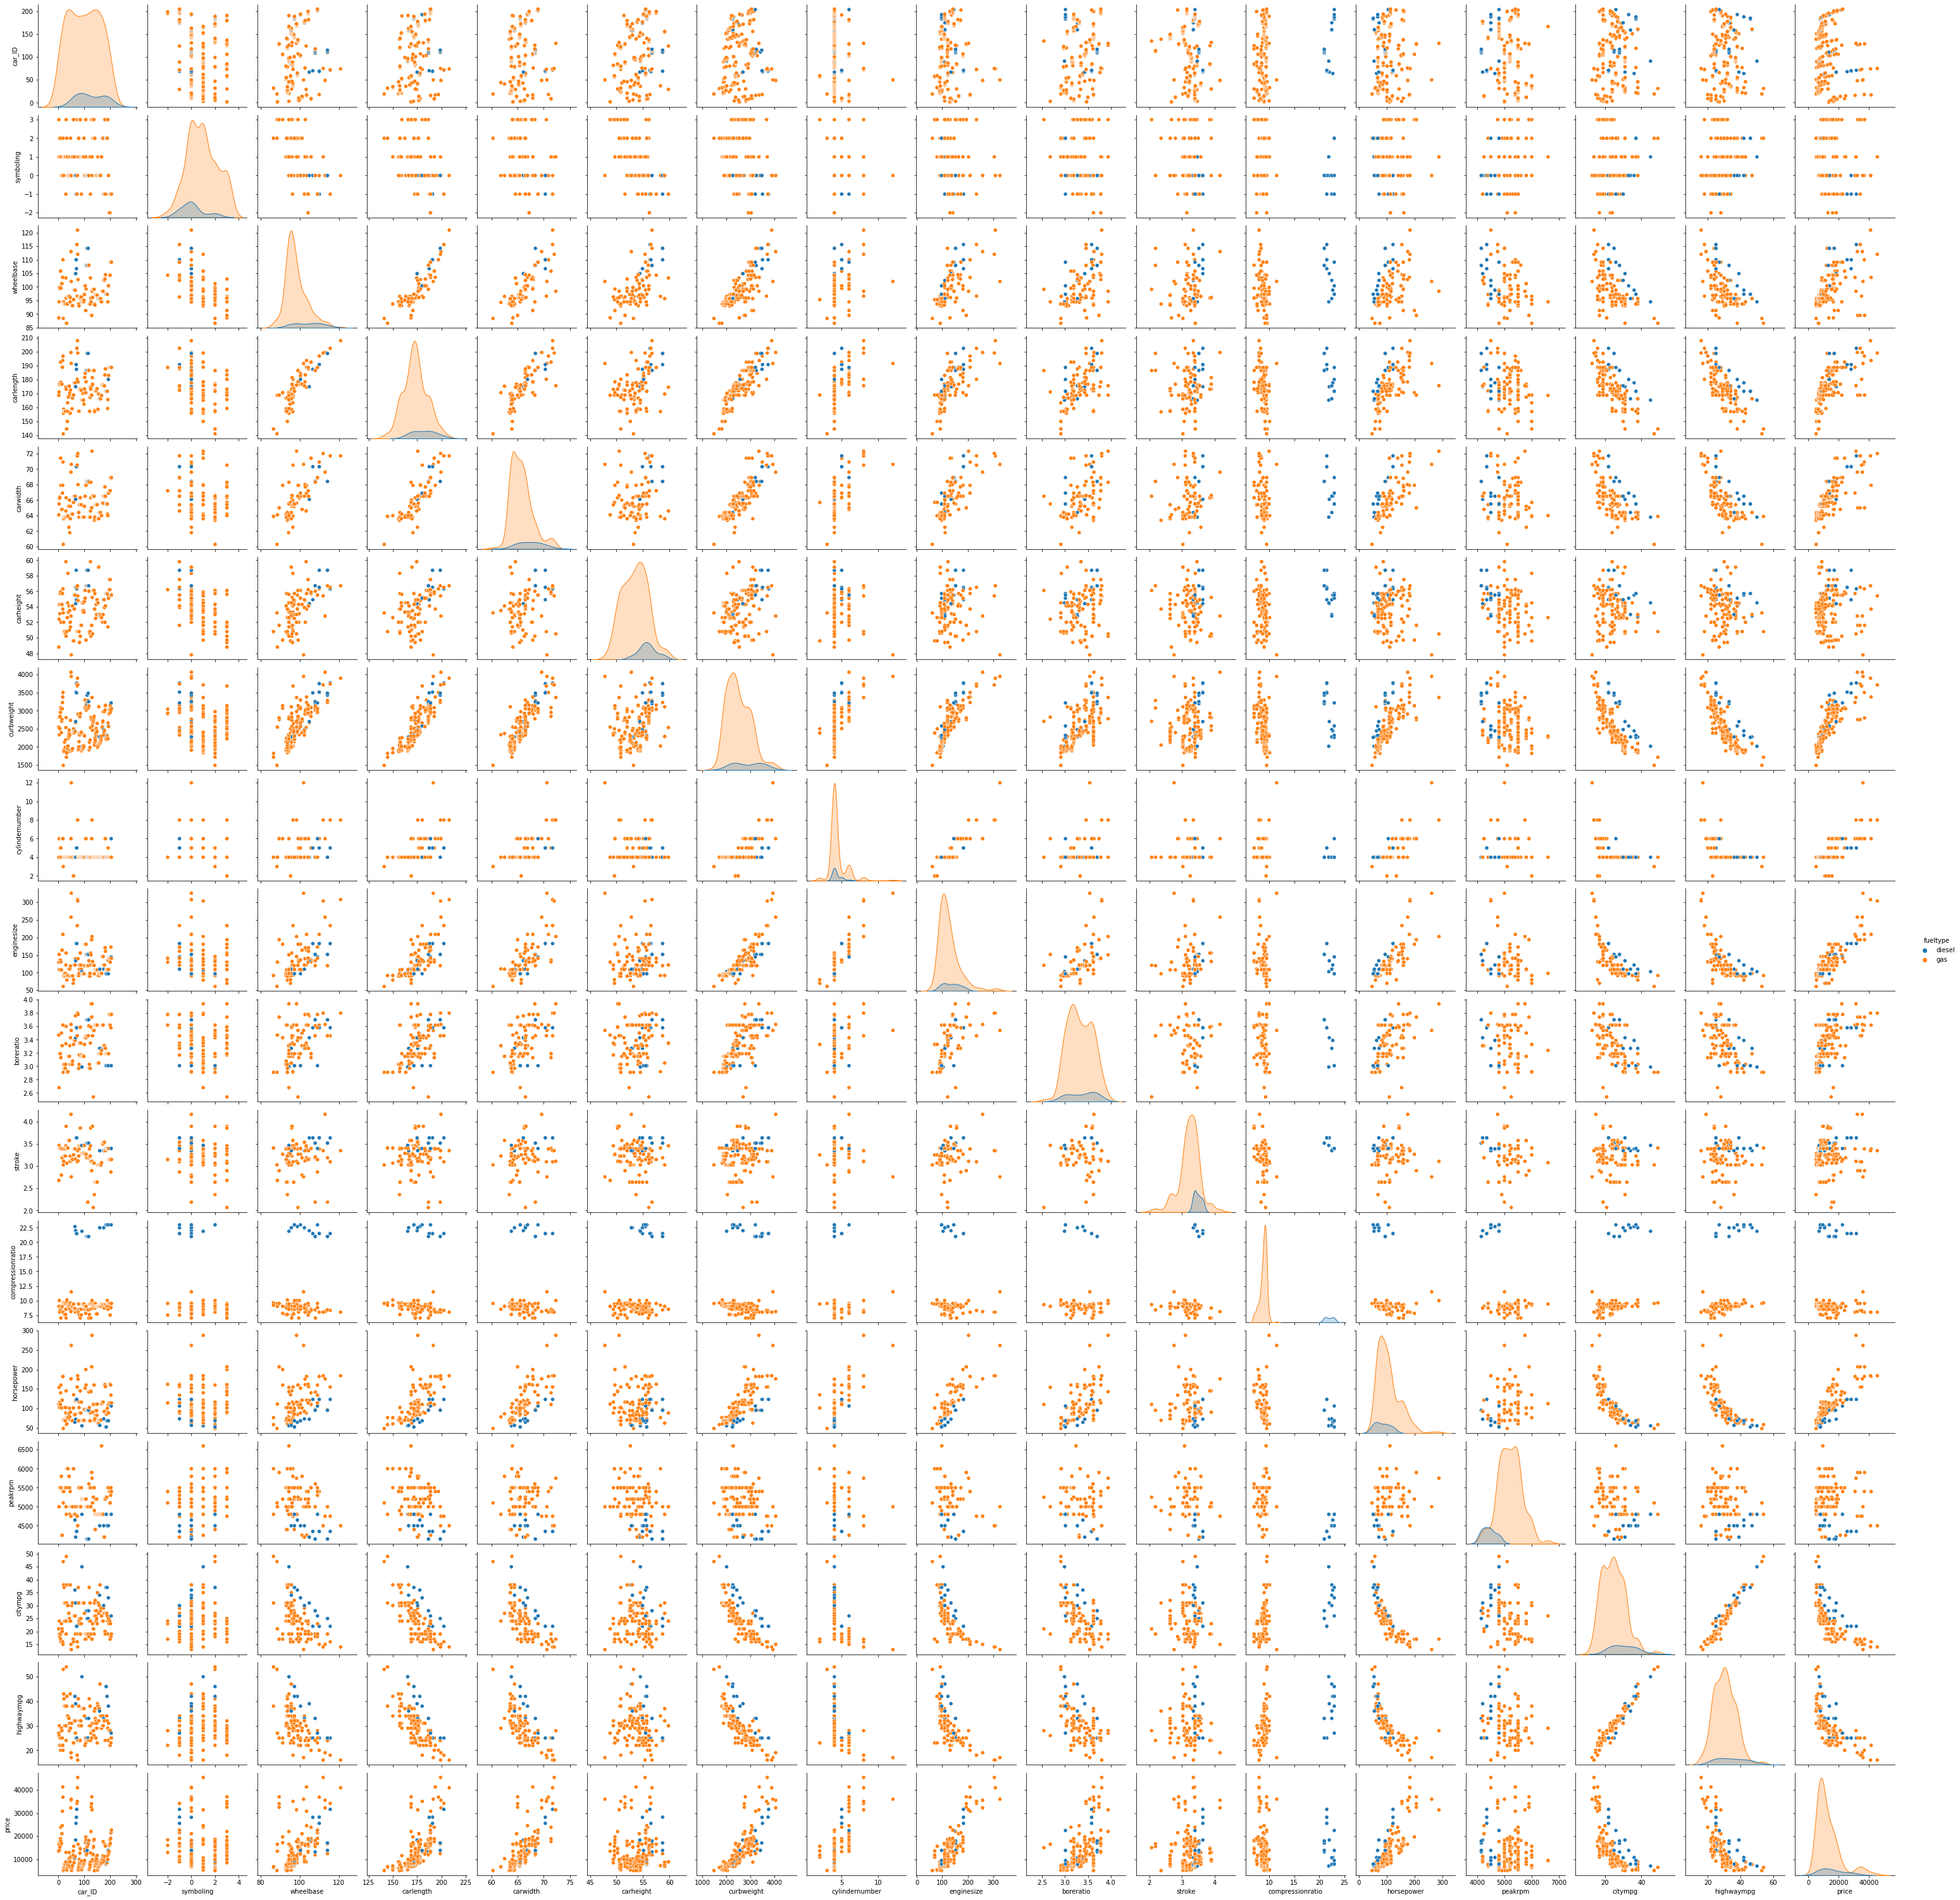

In [19]:
#| label: fig-pairplot
#| fig-cap: "Pairplot with Fuel Type Hue"

# Display a pairplot to quickly see how varaiables relate to one another with 'fueltype' hue
sns.pairplot(dataset, kind= 'scatter', hue= 'fueltype')
plt.show()

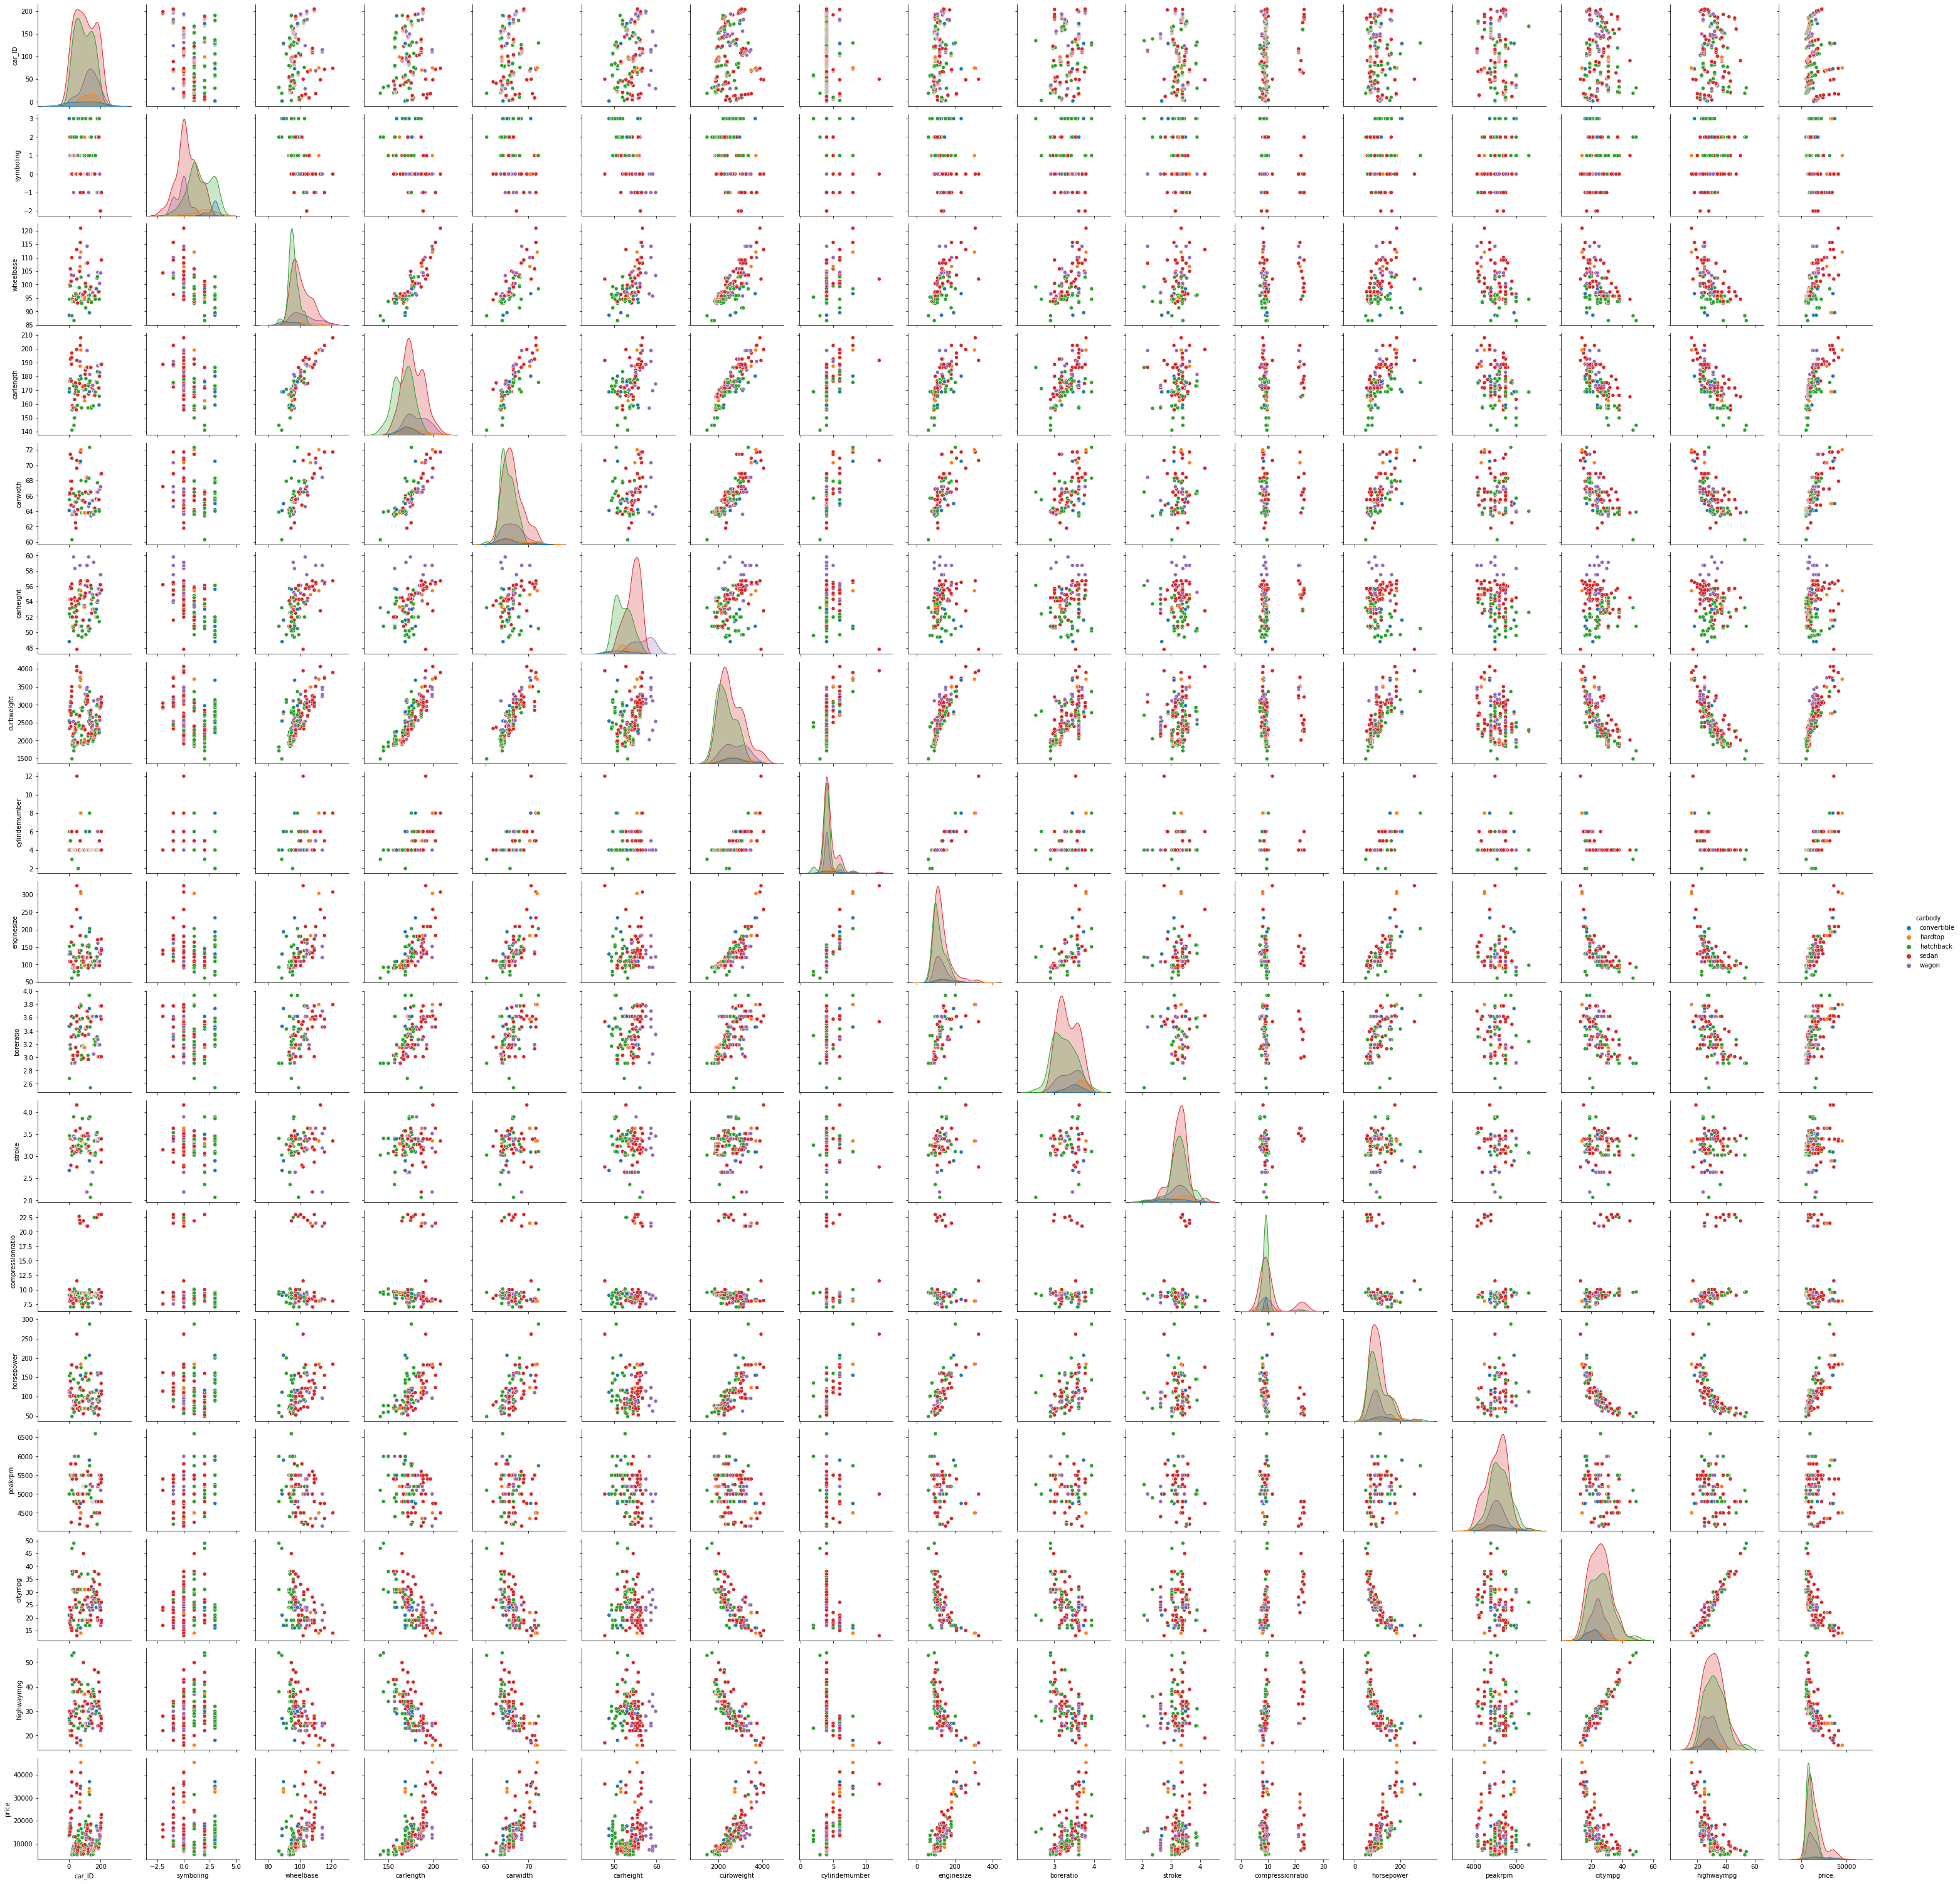

In [20]:
#| echo: false
#| output: false

# Display a pairplot to quickly see how varaiables relate to one another with 'carbody' hue
sns.pairplot(dataset, kind= 'scatter', hue= 'carbody')
plt.show()

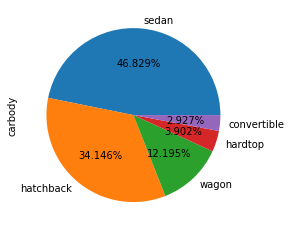

In [19]:
#| label: fig-carbodypie
#| fig-cap: "Carbody Pie Plot"
#| fig-align: "left"

# display pie chart data for carbody
dataset['carbody'].value_counts().plot.pie(autopct='%1.3f%%');

# Display relationship between body style and price
dataset.groupby('carbody')['price'].mean().round(2)

In [23]:
#| echo: false

# Display relationship between body style and price
dataset.groupby('carbody')['price'].mean().round(2)

carbody
convertible    21890.50
hardtop        22208.50
hatchback      10376.65
sedan          14344.27
wagon          12371.96
Name: price, dtype: float64

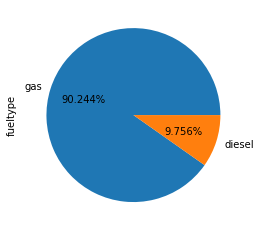

In [20]:
#| label: fig-fueltypepie
#| fig-cap: "Fuel Type Pie Plot"
#| fig-align: "left"

# display pie chart data for fueltype
dataset['fueltype'].value_counts().plot.pie(autopct='%1.3f%%');

# Display ralationship between body style and price
dataset.groupby('fueltype')['price'].mean().round(2)

In [126]:
#| echo: false

# Display ralationship between body style and price
dataset.groupby('fueltype')['price'].mean().round(2)

fueltype
diesel    15838.15
gas       12999.80
Name: price, dtype: float64

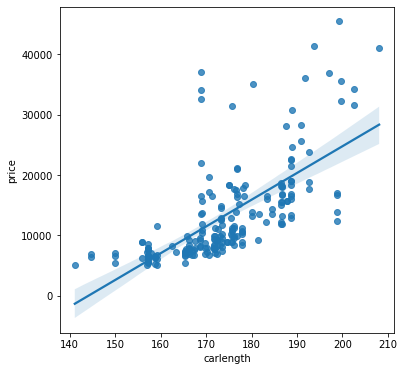

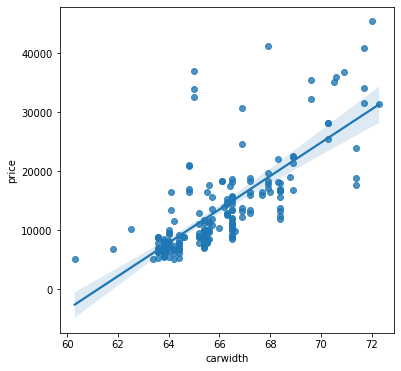

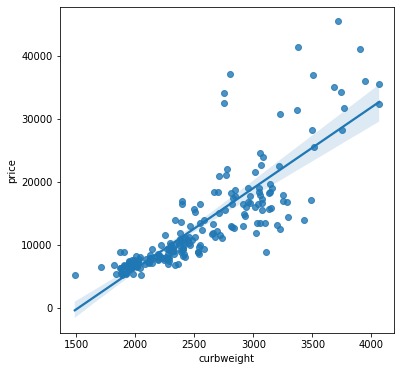

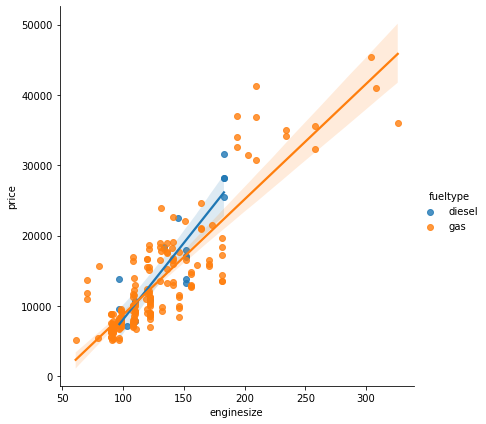

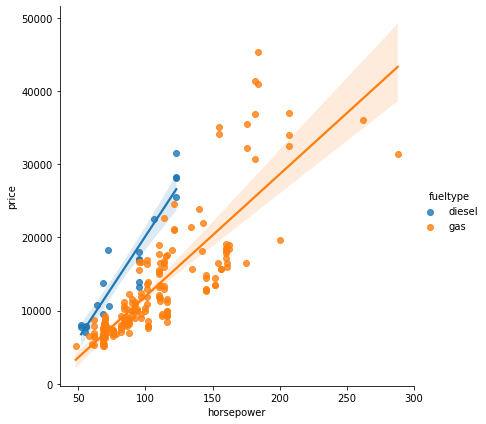

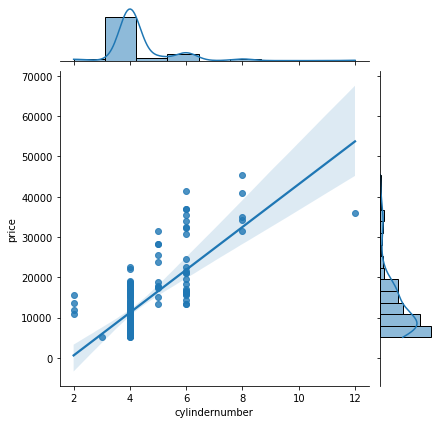

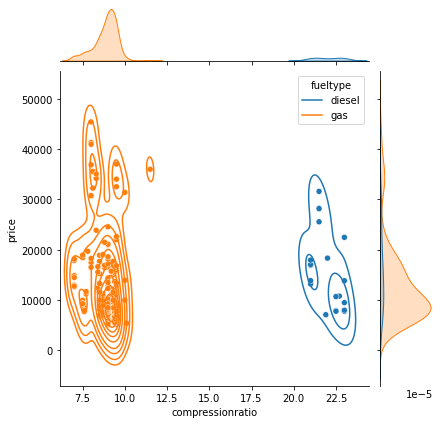

In [16]:
#| label: fig-plots
#| fig-cap: "Plots for visualizing"
#| fig-subcap:
#|   - "Car Length vs Price"
#|   - "Car Width vs Price"
#|   - "Curb Weight vs Price"
#|   - "Engine Size vs Price"
#|   - "Horsepower vs Price"
#|   - "Cylinder Number vs Price"
#|   - "Compression Ratio vs Price"
#| layout-ncol: 2
#| column: page

# Carlength has moderate relationship to price
plt.figure(figsize=(6,6));
sns.regplot(data=dataset, x="carlength", y="price");

# Carwidth has moderate relationship to price
plt.figure(figsize=(6,6));
sns.regplot(data=dataset, x="carwidth", y="price");

# Carweight has moderate/strong relationship to price
plt.figure(figsize=(6,6));
sns.regplot(data=dataset, x="curbweight", y="price");

# Engine size has strong relationship to price
sns.lmplot(data=dataset, x="enginesize", y="price", hue='fueltype', height=6)

# Horsepower has strong relationship to price for both fuel types
sns.lmplot(data=dataset, x="horsepower", y="price", hue='fueltype', height=6)

# Cylinder number has moderate/strong relationship to price
sns.jointplot(data=dataset, x="cylindernumber", y="price", kind="reg");

# Clear classification relationship between compressionratio and fueltype
g = sns.jointplot(data=dataset, x="compressionratio", y="price", hue='fueltype');
g.plot_joint(sns.kdeplot, hue='fueltype');

# Linear Regression
## Univariate Models
Multiple univariate models were trained for comparison using a [custom Linear Regression training function](#lst-linreg). Models were trained with 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize' and 'horsepower' independent variables. In most cases the model accuracy was the best with a 70% training and 30% testing split ( See [Items 3.1.1 - 3.1.4](#car-length-vs-price) ). However, with engine size and horsepower models more accuracy was achieved with an 80% training and 20% testing split ( See [Items 3.1.5 - 3.1.6](#engine-size-vs-price) ).

In [ ]:
#| label: lst-linreg
#| lst-cap: "Custom Linear Regression Function"
#| code-fold: show

# Import regression training libraries and packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Linear Regression training function that takes in X and Y arguments and displays results
def myLinRegModel(x, y, testSize):
    
    # While loop to iterate every 10% from given test size
    while testSize>0:
        
        # Splitting data into training and testing variables using the values passed into function
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=(testSize/100), random_state=0)

        # Training model with LinearRegression function and training data
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
    
        # Print test size of current iteration
        print('Test Size:', testSize, '%\n')

        # Print intercept and CoEfficient values of model
        print("a =", regressor.intercept_)
        print("b =", regressor.coef_)

        # Test the trained model with test data and store in variable
        y_pred = regressor.predict(x_test)

        # Display predicted values next to actual values for comparison
        df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        print(df)
    
        # Display accuracy of model predictions in the form of Mean Absolute Error, Mean Squared Error,
        # Root Mean Squared Error using the difference between actual and predicted values
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('R2 Score: ', metrics.r2_score(y_test,y_pred)*100, '%\n', sep='')
        
        # Decrease test size by 10
        testSize -= 10


### Car Length vs Price

In [ ]:
# Carlength Column
carLength = dataset.iloc[:, 10:-15].values

# Price Column
price = dataset.iloc[:, 25].values.round(2)

# Call custom regression model function with 30% test size
myLinRegModel(carLength, price, 30)

Test Size: 30 %

a = -63541.11342037626
b = [440.33603117]
     Actual     Predicted
0    6795.0   6516.349139
1   15750.0  19153.993234
..      ...           ...
60   6479.0    131.476687
61  15510.0  18625.589997

[62 rows x 2 columns]
Mean Absolute Error: 3981.584437549869
Mean Squared Error: 32715085.38508641
Root Mean Squared Error: 5719.71025359558
R2 Score: 50.45973947401606%

Test Size: 20 %

a = -63738.09854118214
b = [441.42013341]
     Actual     Predicted
0    6795.0   6491.844685
1   15750.0  19160.602514
..      ...           ...
39  45400.0  24192.792035
40   8916.5   5079.300258

[41 rows x 2 columns]
Mean Absolute Error: 4528.295484564718
Mean Squared Error: 43469954.12056989
Root Mean Squared Error: 6593.174813439266
R2 Score: 43.84913586892223%

Test Size: 10 %

a = -66742.8631493445
b = [459.19742348]
     Actual     Predicted
0    6795.0   6315.446927
1   15750.0  19494.412981
..      ...           ...
19   6488.0   6131.767957
20   9959.0  12698.291113

[21 rows x

### Car Width vs Price

In [ ]:
# Carwidth Column
carWidth = dataset.iloc[:, 11:-14].values

# Price Column
price = dataset.iloc[:, 25].values.round(2)

# Call custom regression model function with 30% test size
myLinRegModel(carWidth, price, 30)

Test Size: 30 %

a = -172630.60948546475
b = [2822.14912394]
     Actual     Predicted
0    6795.0   8551.364271
1   15750.0  15042.307256
..      ...           ...
60   6479.0   7704.719534
61  15510.0  15042.307256

[62 rows x 2 columns]
Mean Absolute Error: 3036.57768015824
Mean Squared Error: 22710512.087679498
Root Mean Squared Error: 4765.554751304354
R2 Score: 65.60960571372881%

Test Size: 20 %

a = -172526.22359994025
b = [2819.03318321]
     Actual     Predicted
0    6795.0   8455.706762
1   15750.0  14939.483084
..      ...           ...
39  45400.0  30444.165591
40   8916.5   6764.286852

[41 rows x 2 columns]
Mean Absolute Error: 3674.9155902799166
Mean Squared Error: 31370813.470780104
Root Mean Squared Error: 5600.965405247573
R2 Score: 59.47779746918066%

Test Size: 10 %

a = -181627.87173597398
b = [2957.89666431]
     Actual     Predicted
0    6795.0   8269.094113
1   15750.0  15072.256441
..      ...           ...
19   6488.0   6494.356114
20   9959.0  11818.570110



### Curb Weight vs Price

In [ ]:
# Curbweight Column
carWeight = dataset.iloc[:, 13:-12].values

# Price Column
price = dataset.iloc[:, 25].values.round(2)

# Call custom regression model function with 30% test size
myLinRegModel(carWeight, price, 30)

Test Size: 30 %

a = -18679.037713196016
b = [12.40359272]
     Actual     Predicted
0    6795.0   4949.806413
1   15750.0  20404.682939
..      ...           ...
60   6479.0   2568.316611
61  15510.0  15530.071001

[62 rows x 2 columns]
Mean Absolute Error: 2670.404540077829
Mean Squared Error: 18443910.151758883
Root Mean Squared Error: 4294.637371392244
R2 Score: 72.0704958192619%

Test Size: 20 %

a = -18833.605447325583
b = [12.47623193]
     Actual     Predicted
0    6795.0   4933.616372
1   15750.0  20479.001353
..      ...           ...
39  45400.0  27515.596159
40   8916.5   4546.853183

[41 rows x 2 columns]
Mean Absolute Error: 3256.3206631106873
Mean Squared Error: 25249391.034916148
Root Mean Squared Error: 5024.877215904499
R2 Score: 67.3849408384091%

Test Size: 10 %

a = -19880.405624111718
b = [12.9537027]
     Actual     Predicted
0    6795.0   4796.398026
1   15750.0  20936.711595
..      ...           ...
19   6488.0   6221.305324
20   9959.0  10819.869783

[21 rows

### Cylinder Number vs Price

In [ ]:
# Cylinder Number Column
cylinderNumber = dataset.iloc[:, 15:-10].values

# Price Column
price = dataset.iloc[:, 25].values.round(2)

# Call custom regression model function with 30% test size
myLinRegModel(cylinderNumber, price, 30)

Test Size: 30 %

a = -8750.74345729567
b = [5045.13677503]
     Actual     Predicted
0    6795.0  11429.803643
1   15750.0  21520.077193
..      ...           ...
60   6479.0  11429.803643
61  15510.0  11429.803643

[62 rows x 2 columns]
Mean Absolute Error: 3944.3868255082953
Mean Squared Error: 26684225.038138304
Root Mean Squared Error: 5165.677597192676
R2 Score: 59.59223566856468%

Test Size: 20 %

a = -9046.162097201766
b = [5112.35112126]
     Actual     Predicted
0    6795.0  11403.242388
1   15750.0  21627.944630
..      ...           ...
39  45400.0  31852.646873
40   8916.5  11403.242388

[41 rows x 2 columns]
Mean Absolute Error: 4280.5628888250285
Mean Squared Error: 32605207.611888204
Root Mean Squared Error: 5710.096987958103
R2 Score: 57.88330998687709%

Test Size: 10 %

a = -10564.254121382277
b = [5479.84028365]
     Actual     Predicted
0    6795.0  11355.107013
1   15750.0  22314.787580
..      ...           ...
19   6488.0  11355.107013
20   9959.0  11355.107013

[

### Engine Size vs Price

In [ ]:
# Engine Size Column
engineSize = dataset['enginesize'].values.reshape(-1, 1)

# Price Column
price = dataset.iloc[:, 25].values.round(2)

# Call custom regression model function with 30% test size
myLinRegModel(engineSize, price, 30)

Test Size: 30 %

a = -7574.131488222356
b = [163.29075344]
     Actual     Predicted
0    6795.0   7285.327074
1   15750.0  18715.679815
..      ...           ...
60   6479.0   7448.617828
61  15510.0  12184.049678

[62 rows x 2 columns]
Mean Absolute Error: 2898.9726929694702
Mean Squared Error: 14541824.65222288
Root Mean Squared Error: 3813.374444271488
R2 Score: 77.97940083865093%

Test Size: 20 %

a = -7613.370926304753
b = [164.31545176]
     Actual     Predicted
0    6795.0   7339.335184
1   15750.0  18841.416808
..      ...           ...
39  45400.0  42338.526410
40   8916.5   7175.019732

[41 rows x 2 columns]
Mean Absolute Error: 3195.031241401546
Mean Squared Error: 16835544.028987687
Root Mean Squared Error: 4103.113942969131
R2 Score: 78.25324722629195%

Test Size: 10 %

a = -8207.420855494747
b = [169.490971]
     Actual     Predicted
0    6795.0   7216.257505
1   15750.0  19080.625475
..      ...           ...
19   6488.0   7385.748476
20   9959.0  10436.585954

[21 rows

### Horsepower vs Price

In [ ]:
# Horsepower Column
horsepower = dataset.iloc[:, 21:-4].values

# Price Column
price = dataset.iloc[:, 25].values.round(2)

# Call custom regression model function with 30% test size
myLinRegModel(horsepower, price, 30)

Test Size: 30 %

a = -4438.686268723588
b = [170.53827527]
     Actual     Predicted
0    6795.0   7157.916450
1   15750.0  22165.284674
..      ...           ...
60   6479.0   5452.533697
61  15510.0  14320.524011

[62 rows x 2 columns]
Mean Absolute Error: 3518.2488303322393
Mean Squared Error: 25821021.51495541
Root Mean Squared Error: 5081.438921698795
R2 Score: 60.89937966412712%

Test Size: 20 %

a = -4053.153036276188
b = [166.64923709]
     Actual     Predicted
0    6795.0   7278.995086
1   15750.0  21944.127950
..      ...           ...
39  45400.0  26610.306588
40   8916.5   7612.293560

[41 rows x 2 columns]
Mean Absolute Error: 3733.6933754512147
Mean Squared Error: 29626244.692692798
Root Mean Squared Error: 5442.999604325983
R2 Score: 61.73128603174041%

Test Size: 10 %

a = -4796.241165629246
b = [174.95075436]
     Actual     Predicted
0    6795.0   7100.410131
1   15750.0  22496.076514
..      ...           ...
19   6488.0   6050.705605
20   9959.0  15498.046340

[21 r

## Multivariate Models
Multiple univariate models were trained for comparison using a [custom Linear Regression training function](#lst-linreg). Accuracy varies in each model with changes in training/test splits and would most likely would be benefitted with more rows of data ( See [Items 3.2.1 - 3.2.3](#carlength-carwidth-curbweight-vs-price) ). The highest accurracy is seen with the model that takes in the most columns for the independent variables ( See [Items 3.2.3](#carlength-carwidth-curbweight-cylinder-number-engine-size-horsepower-vs-price) ).

### Carlength, Carwidth, Curbweight vs Price

In [ ]:
# Create copy of dataset and drop all columns not used for multivariate regression models
datasetCopy = dataset
datasetCopy.drop(['carheight', 'enginetype', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio'],\
inplace=True, axis=1)

# Store carlength, carwidth & curbweight columns in X
X1 = datasetCopy.iloc[:, 10:-7].values

# Call Regression Model Function with multiple x values & 30% test size
myLinRegModel(X1, price, 30)

Test Size: 30 %

a = -36739.21951780665
b = [-208.48890057  764.98885537   13.97180015]
     Actual     Predicted
0    6795.0   5818.760203
1   15750.0  19003.466111
..      ...           ...
60   6479.0   5929.766976
61  15510.0  13762.735333

[62 rows x 2 columns]
Mean Absolute Error: 2458.5442776902337
Mean Squared Error: 16492573.815910544
Root Mean Squared Error: 4061.1049993703123
R2 Score: 75.02539290462342%

Test Size: 20 %

a = -44634.67127094674
b = [-188.42001434  856.204069     13.34802623]
     Actual     Predicted
0    6795.0   5783.995638
1   15750.0  18977.251262
..      ...           ...
39  45400.0  29066.672270
40   8916.5   5459.428429

[41 rows x 2 columns]
Mean Absolute Error: 2943.0381053387778
Mean Squared Error: 22423198.502769
Root Mean Squared Error: 4735.313981434494
R2 Score: 71.03558082852051%

Test Size: 10 %

a = -51021.53652492876
b = [-194.19115484  961.28023332   13.59661598]
     Actual     Predicted
0    6795.0   5698.395155
1   15750.0  19277.43705

### Cylinder Number, Engine Size, Horsepower vs Price

In [ ]:
# Store cylindernumber, enginesize & horsepower columns in X
X2 = datasetCopy.iloc[:, 13:-4].values

# Call Regression Model Function with multiple x values & 30% test size
myLinRegModel(X2, price, 30)

Test Size: 30 %

a = -6717.131795698624
b = [-875.82889691  133.38667558   65.31455209]
     Actual     Predicted
0    6795.0   6359.129636
1   15750.0  19692.219717
..      ...           ...
60   6479.0   5839.370791
61  15510.0  13103.941091

[62 rows x 2 columns]
Mean Absolute Error: 2681.2430726638395
Mean Squared Error: 13246002.119140355
Root Mean Squared Error: 3639.505752041114
R2 Score: 79.941657245098%

Test Size: 20 %

a = -7307.824968281864
b = [-522.31275964  128.16628088   63.17240963]
     Actual     Predicted
0    6795.0   6561.779408
1   15750.0  20047.965597
..      ...           ...
39  45400.0  39099.945713
40   8916.5   6559.957946

[41 rows x 2 columns]
Mean Absolute Error: 3028.44528450474
Mean Squared Error: 15255724.671464592
Root Mean Squared Error: 3905.8577382522003
R2 Score: 80.29392621688581%

Test Size: 10 %

a = -7824.384102535303
b = [-613.42877141  135.45474355   63.82356299]
     Actual     Predicted
0    6795.0   6388.284759
1   15750.0  20259.732808

### Carlength, Carwidth, Curbweight, Cylinder Number, Engine Size, Horsepower vs Price

In [ ]:
# Store carlength, carwidth, curbweight, cylindernumber,
# enginesize & horsepower columns in X
X3 = datasetCopy.iloc[:, 10:-4].values

# Call Regression Model Function with multiple x values & 30% test size
myLinRegModel(X3, price, 30)

Test Size: 30 %

a = -50133.27454870472
b = [-62.20404054 772.47835707   3.18527494  18.99449375  65.77507898
  64.33402142]
     Actual     Predicted
0    6795.0   6067.345502
1   15750.0  20331.280734
..      ...           ...
60   6479.0   5548.422659
61  15510.0  13525.755400

[62 rows x 2 columns]
Mean Absolute Error: 2536.7293535638096
Mean Squared Error: 12555624.008739235
Root Mean Squared Error: 3543.39159686581
R2 Score: 80.98709273909488%

Test Size: 20 %

a = -54793.72590677004
b = [-38.92156396 789.71920542   2.95208156 366.09875078  59.3369646
  58.3182745 ]
     Actual     Predicted
0    6795.0   6167.243070
1   15750.0  20562.635157
..      ...           ...
39  45400.0  36977.654082
40   8916.5   5783.745608

[41 rows x 2 columns]
Mean Absolute Error: 2873.7239149228203
Mean Squared Error: 16025434.859390952
Root Mean Squared Error: 4003.178094887979
R2 Score: 79.29967874050975%

Test Size: 10 %

a = -55531.82635570387
b = [-30.01857827 784.53201154   2.29960226 213.59

# KNeigbors vs Decision Tree Classification
KNeigbors and Decision Tree models are trained side-by-side for comparison using a [custom Classification Model training function](#lst-classfunc). [Items 4.1 – 4.3](#no-scaling) display model accurracy in conjuction with data scaling strategies. Accuracy in both models improves to 100% when normalizing or standardizing data (See Figures [5](#fig-classifiersnoscale), [6](#fig-classifiersstandard) & [7](#fig-classifiersnormal)).

In [ ]:
#| label: lst-classfunc
#| lst-cap: "Custom Classification Model Training Function"
#| code-fold: show

# Import classification training libraries and packages
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Packages for displaying classification accuracy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
np.set_printoptions(suppress=True)

# Classification training function that takes in X values to classify according to Y values
# and takes what scalar should be used
def myClassModel(X, y, scale):
    
    # Split dataset into random train and test subsets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

    # Standardizes data if specified when calling function
    if scale == 'Standardize':
    
        # Standardize features by removing mean and scaling to unit variance:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    
    # Normalizes data if specified when calling function
    elif scale == "Normalize":
    
        # Normalize features by shrinking data range between 0 & 1:
        scaler = MinMaxScaler()
        scaler.fit(X_train)

        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

    # Use the KNN classifier to fit data:
    knclassifier = KNeighborsClassifier(n_neighbors=5)
    knclassifier.fit(X_train, y_train) 

    # Predict y data with KNN classifier: 
    y_predict = knclassifier.predict(X_test)

    # Print KNN classifier results:
    print("KNeigbors Classifier - Scaling:", scale)
    cm = confusion_matrix(y_test, y_predict, labels=knclassifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knclassifier.classes_)
    disp.plot()
    plt.show()
    print(classification_report(y_test, y_predict))
    
     # Use the Decision Tree classifier to fit data:
    dtclassifier = DecisionTreeClassifier()
    dtclassifier.fit(X_train, y_train) 

    # Predict y data with Decision Tree classifier: 
    y_predict = dtclassifier.predict(X_test)

    # Print Decision Tree classifier results:
    print("Decision Tree Classifier - Scaling:", scale)
    cm = confusion_matrix(y_test, y_predict, labels=dtclassifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtclassifier.classes_)
    disp.plot()
    plt.show()
    print(classification_report(y_test, y_predict))


In [ ]:
#| echo: false
pd.set_option('display.max_rows', None)

## No Scaling

KNeigbors Classifier - Scaling: None


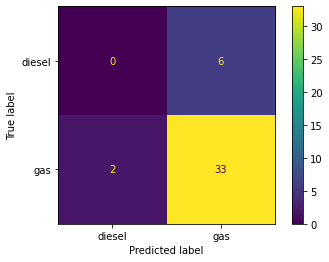

              precision    recall  f1-score   support

      diesel       0.00      0.00      0.00         6
         gas       0.85      0.94      0.89        35

    accuracy                           0.80        41
   macro avg       0.42      0.47      0.45        41
weighted avg       0.72      0.80      0.76        41

Decision Tree Classifier - Scaling: None


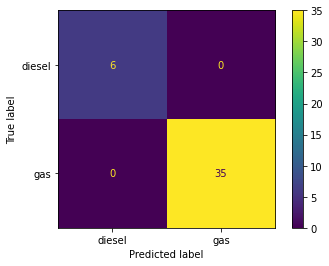

              precision    recall  f1-score   support

      diesel       1.00      1.00      1.00         6
         gas       1.00      1.00      1.00        35

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [ ]:
#| label: fig-classifiersnoscale
#| fig-cap: "Classifier Models Confusion Matrices - No Scaling"
#| fig-subcap:
#|   - "KNeigbors Classifier"
#|   - "Decision Tree Classifier"
#| layout: [[1], [1, 1]]
# Store all numeric values in X
X = dataset[['wheelbase', 'carlength', 'carwidth', 'carheight',\
             'curbweight', 'cylindernumber', 'enginesize', 'boreratio',\
             'stroke', 'compressionratio', 'horsepower', 'peakrpm',\
             'citympg', 'highwaympg', 'price']].values

# Classify according to fuel type
y = dataset['fueltype']

# Call Classification Model Function with no scalar
myClassModel(X, y, 'None')

## Standardized Scaling

KNeigbors Classifier - Scaling: Standardize


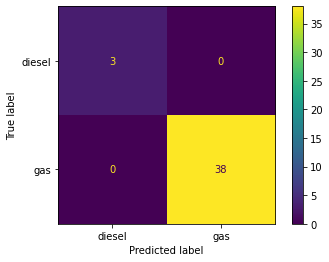

              precision    recall  f1-score   support

      diesel       1.00      1.00      1.00         3
         gas       1.00      1.00      1.00        38

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Decision Tree Classifier - Scaling: Standardize


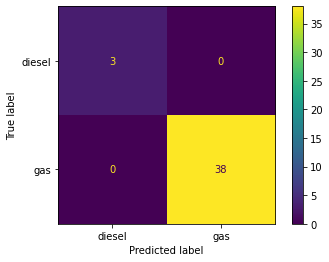

              precision    recall  f1-score   support

      diesel       1.00      1.00      1.00         3
         gas       1.00      1.00      1.00        38

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [ ]:
#| label: fig-classifiersstandard
#| fig-cap: "Classifier Models Confusion Matrices - Standard Scaling"
#| fig-subcap:
#|   - "KNeigbors Classifier"
#|   - "Decision Tree Classifier"
#| layout: [[1], [1, 1]]
# Store all numeric values in X
X = dataset[['wheelbase', 'carlength', 'carwidth', 'carheight',\
             'curbweight', 'cylindernumber', 'enginesize', 'boreratio',\
             'stroke', 'compressionratio', 'horsepower', 'peakrpm',\
             'citympg', 'highwaympg', 'price']].values

# Classify according to fuel type
y = dataset['fueltype']

# Call Classification Model Function with no scalar
myClassModel(X, y, 'Standardize')

## Normalized Scaling

KNeigbors Classifier - Scaling: Normalize


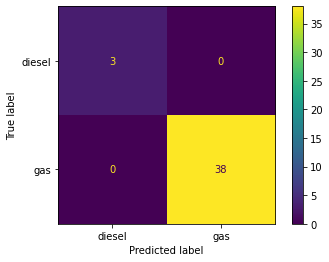

              precision    recall  f1-score   support

      diesel       1.00      1.00      1.00         3
         gas       1.00      1.00      1.00        38

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Decision Tree Classifier - Scaling: Normalize


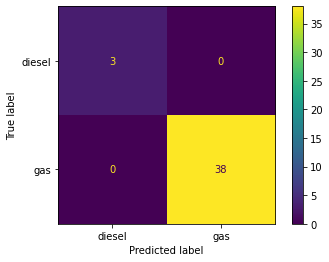

              precision    recall  f1-score   support

      diesel       1.00      1.00      1.00         3
         gas       1.00      1.00      1.00        38

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [ ]:
#| label: fig-classifiersnormal
#| fig-cap: "Classifier Models Confusion Matrices - Normalized Scaling"
#| fig-subcap:
#|   - "KNeigbors Classifier"
#|   - "Decision Tree Classifier"
#| layout: [[1], [1, 1]]
# Store all numeric values in X
X = dataset[['wheelbase', 'carlength', 'carwidth', 'carheight',\
             'curbweight', 'cylindernumber', 'enginesize', 'boreratio',\
             'stroke', 'compressionratio', 'horsepower', 'peakrpm',\
             'citympg', 'highwaympg', 'price']].values

# Classify according to fuel type
y = dataset['fueltype']

# Call Classification Model Function with no scalar
myClassModel(X, y, 'Normalize')

# Clustering
Kmeans, Gaussian Mixture and Spectral clustering models are trained using a [custom cluster model training function](#lst-clusfunc). [Items 5.1 – 5.3](#kmeans-model) display each model's code and results when trained with unchanged data and normalized data. In all three (3) models, the "price" data heavily biased the results, which is corrected by normalizing the data providing more accuracy in each case. The spectral clustering model trained with normalized data performed marginally better than its counterparts ( See [Items 5.1 – 5.3](#kmeans-model) ).

In [ ]:
#| label: lst-clusfunc
#| lst-cap: "Custom Cluster Model Training Function"
#| code-fold: show

# Import clustering packages
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

# Cluster training function that takes in X values to cluster, along with
# what model should be used and how many clusters should be created
def myClusterModel(X, model, num_clusters):
    
    # Store columns names of features
    column_name = list(X.columns)
    # Stores feature values fro use in some models
    features = X.values
    
    # Takes given features and creates dataframe for some models
    X = pd.DataFrame(X)
    
    # Normalize features
    scaler = MinMaxScaler()
    scaler.fit(features)
    scaled = scaler.transform(features)
    
    # For KMeans model
    if model=='KM':
        # Initialize KMeans model with given number of clusters
        kmeans = KMeans(n_clusters=num_clusters)
        
        # Produce clusters with model and append cluster label info to DataFrame X
        X['cluster'] = kmeans.fit_predict(features)
        
        # Set plot size
        plt.figure(figsize=(6, 6))
        # Plot data with given features
        plt.scatter(X[column_name[0]], X[column_name[1]])

        # Plot KMeans cluster centers
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
        # Display plot
        plt.xlabel(column_name[0])
        plt.ylabel(column_name[1])
        plt.xlim(0,31)
        plt.ylim(0,55000)
        plt.title('KMeans Cluster Model - No Scaling')
        plt.show()

        # Display scatter plot with KDE to see compare how well
        # model performed at creating relevant clusters
        g = sns.jointplot(data=X, x=column_name[0], y=column_name[1], hue='cluster')
        g.fig.suptitle("KMeans Cluster Model - No Scaling")
        g.plot_joint(sns.kdeplot, levels=3)
            
        # Delete cluster column so we can add scaled cluster labels to plot 
        X.drop('cluster', inplace=True, axis=1)
        
        # Appends new scaled cluster label info to DataFrame X
        X['cluster'] = kmeans.fit_predict(scaled)
            
        # Display scatter plot with KDE to see compare how well
        # model performed at creating relevant clusters with scaled data
        g = sns.jointplot(data=X, x=column_name[0], y=column_name[1], hue='cluster', xlim=(0,31))
        g.fig.suptitle("KMeans Cluster Model - Normalized Features")
        g.plot_joint(sns.kdeplot, levels=num_clusters)
            
    # For Gaussian Mixture model    
    elif model=='GMM':
        # Initialize Gaussian Mixture with given number of clusters
        gmm_model = GaussianMixture(n_components=num_clusters)
        gmm_model.fit(features)

        # Produce clusters with model and append cluster label info to DataFrame X
        X['cluster'] = gmm_model.predict(features)

        # Display scatter plot with KDE to see compare how well
        # model performed at creating relevant clusters
        g = sns.jointplot(data=X, x='compressionratio', y='price', hue="cluster")
        g.fig.suptitle("Gaussian Mixture Model - No Scaling")
        g.plot_joint(sns.kdeplot, levels=num_clusters, common_norm=False)
        
        # Feed scaled data into model
        gmm_model.fit(scaled)
 
        # Delete cluster column so we can add scaled cluster labels to plot
        X.drop('cluster', inplace=True, axis=1)
    
        # Appends new scaled cluster label info to DataFrame X
        X['cluster'] = gmm_model.predict(scaled)

        # Display scatter plot with KDE to see compare how well
        # model performed at creating relevant clusters with scaled data
        g = sns.jointplot(data=X, x='compressionratio', y='price', hue='cluster', xlim=(0,31))
        g.fig.suptitle("Gaussian Mixture Model - Normalized Features")
        g.plot_joint(sns.kdeplot, levels=num_clusters)
    
    elif model=='SC':
        # Initialize KMeans model with given number of clusters
        sc = SpectralClustering(n_clusters=num_clusters, random_state=25, n_neighbors=25,\
        affinity='nearest_neighbors')
        
        # Appends cluster label info to DataFrame X
        X['cluster'] = sc.fit_predict(X[[column_name[0], column_name[1]]])
        
        # Display scatter plot with KDE to see compare how well
        # model performed at creating relevant clusters
        g = sns.jointplot(data=X, x='compressionratio', y='price', hue="cluster")
        g.fig.suptitle("Spectral Clustering Model - No Scaling")
        g.plot_joint(sns.kdeplot, levels=num_clusters, common_norm=False)
        
        # Delete cluster column so we can add scaled cluster labels to plot
        X.drop('cluster', inplace=True, axis=1)
        
        # convert scaled values to dataframe to be used by model
        scaled = pd.DataFrame(scaled)
        
        # Appends new scaled cluster label info to DataFrame X
        X['cluster'] = sc.fit_predict(scaled[[0, 1]])
        
        # Display scatter plot with KDE to see compare how well
        # model performed at creating relevant clusters with scaled data
        g = sns.jointplot(data=X, x='compressionratio', y='price', hue="cluster", xlim=(0,31))
        g.fig.suptitle("Spectral Clustering Model - Normalized Features")
        g.plot_joint(sns.kdeplot, levels=num_clusters, common_norm=False)

## KMeans Model

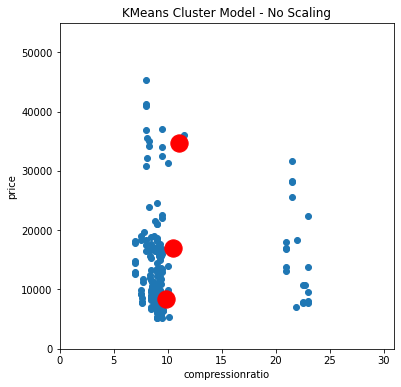

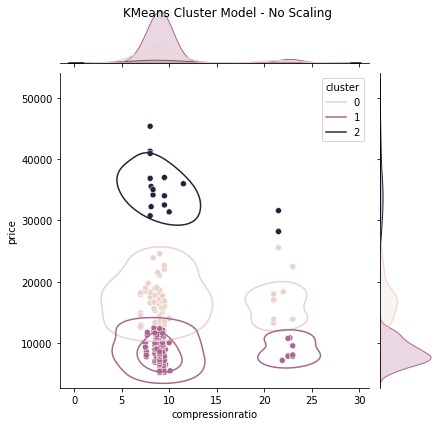

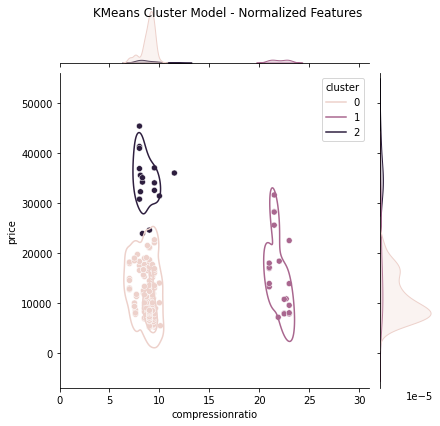

In [ ]:
#| label: fig-kmeanscluster
#| fig-cap: "KMeans Cluster Model Visualizations"
#| fig-subcap:
#|   - "Scatter Plot - No Scaling"
#|   - "Joint Plot - No Scaling"
#|   - "Joint Plot - Normalized Scaling"
#| layout-ncol: 2
#| column: page
# Store all features in X
X = dataset[['compressionratio', 'price']]

# KMeans Cluster Model to be used
model = 'KM'

# Number of clusters to be created
n_clusters = 3

# Call Clustering Model Function and pass in features
# model & number of clusters
myClusterModel(X, model, n_clusters)

## Gaussian Mixture Model

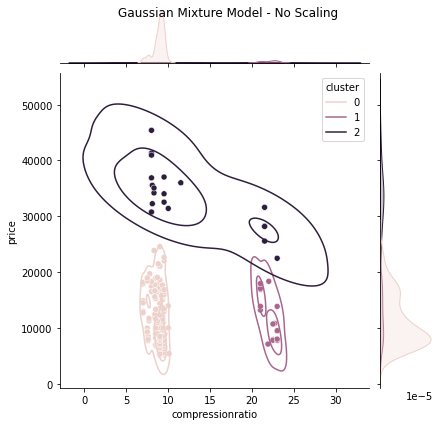

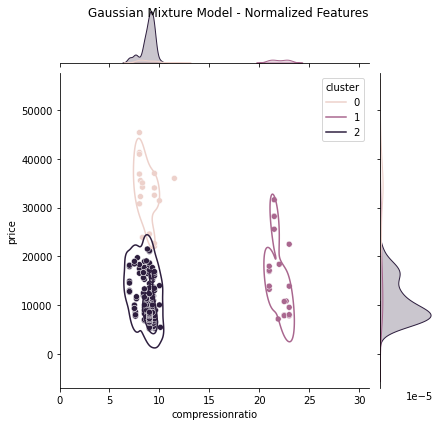

In [ ]:
#| label: fig-gaussiancluster
#| fig-cap: "Gaussian Mixture Cluster Model Visualizations"
#| fig-subcap:
#|   - "Joint Plot - No Scaling"
#|   - "Joint Plot - Normalized Scaling"
#| layout-ncol: 2
#| column: page
# Store all features in X
X = dataset[['compressionratio', 'price']]

# Gaussian Mixture Model to be used
model = 'GMM'

# Number of clusters to be created
n_clusters = 3

# Call Clustering Model Function and pass in features
# model & number of clusters
myClusterModel(X, model, n_clusters)

## Spectral Clustering Model

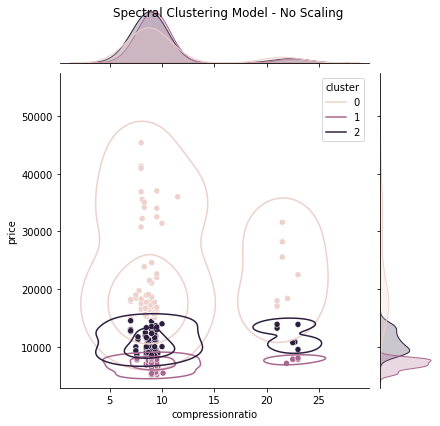

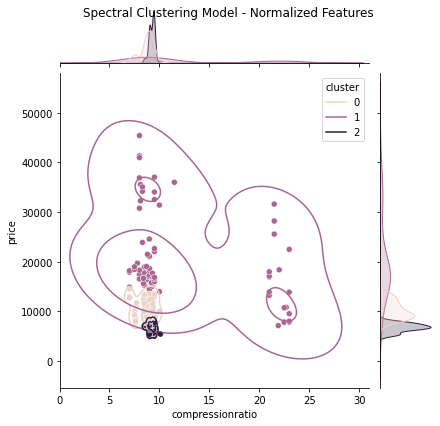

In [ ]:
#| label: fig-spectralcluster
#| fig-cap: "Spectral Clustering Model Visualizations"
#| fig-subcap:
#|   - "Joint Plot - No Scaling"
#|   - "Joint Plot - Normalized Scaling"
#| layout-ncol: 2
#| column: page
# Store all features in X
X = dataset[['compressionratio', 'price']]

# Spectral Clustering Model to be used
model = 'SC'

# Number of clusters to be created
n_clusters = 3

# Call Clustering Model Function and pass in features
# model & number of clusters
myClusterModel(X, model, n_clusters)

# Appendix {.unnumbered}
## References {.unnumbered}

**Dataset**\
[https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv)

**Data Cleaning**\
[https://datatofish.com/category/python/](https://datatofish.com/category/python/)

**Data Scaling**\
[https://dataakkadian.medium.com/standardization-vs-normalization-da7a3a308c64](https://dataakkadian.medium.com/standardization-vs-normalization-da7a3a308c64)\
[https://medium.datadriveninvestor.com/data-pre-processing-with-scikit-learn-9896c561ef2f](https://medium.datadriveninvestor.com/data-pre-processing-with-scikit-learn-9896c561ef2f)

**Measuring Accuracy**\
[https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/](https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/)

**Visualizations**\
[https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)\
[https://seaborn.pydata.org/api.html](https://seaborn.pydata.org/api.html)\
[https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html)

**Classification & Clustering Models**\
[https://www.activestate.com/resources/quick-reads/how-to-classify-data-in-python/](https://www.activestate.com/resources/quick-reads/how-to-classify-data-in-python/)\
[https://builtin.com/data-science/data-clustering-python](https://builtin.com/data-science/data-clustering-python)\
[https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203](https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203)

**General Python**\
[https://stackoverflow.com](https://stackoverflow.com)